# Note analysis

This notebook analyses note usage, helpfulness and agreement in regards to bias and factuality (RQ2 in the paper)

## Loading in data and doing descriptive statistics

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
notes = pd.read_csv('notes_with_bias_2.csv')

In [1256]:
len(notes)

155016

In [1257]:
notes.head()

,noteId,noteAuthorParticipantId,createdAtMillis,tweetId,classification,believable,harmful,validationDifficulty,misleadingOther,misleadingFactualError,...,url,url_in_sources,bias_score,factuality_score,currentStatus,participantId,enrollmentState,agree,disagree,agreement
0,1537142913737428992,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1655318404027,1377030478167937024,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,...,"['forbes.com', 'washingtonpost.com']",True,0.50,3.00,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0
1,1537204430730211328,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1655333070821,1537196168953974784,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,...,"['nytimes.com', 'wsj.com', 'nytimes.com']",True,0.67,3.67,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0
2,1540422295029551104,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1656100269455,1540087463099736065,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,...,['cnn.com'],True,1.00,3.00,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0
3,1586769867381669889,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1667150391800,1586411168880807936,NOT_MISLEADING,NaN,NaN,NaN,0,0,...,"['nytimes.com', 'washingtonpost.com']",True,1.00,3.50,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0
4,1640795953472114688,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1680031214479,1640773789679230977,NOT_MISLEADING,NaN,NaN,NaN,0,0,...,"['npr.org', 'statista.com']",True,0.50,4.00,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0


In [1258]:
notes.bias_score.value_counts()

bias_score
 0.00    70173
 1.00    57213
 0.50     6780
-1.00     6607
 0.67     4262
         ...  
-1.60        1
-1.80        1
-1.75        1
-0.14        1
 0.58        1
Name: count, Length: 66, dtype: int64

In [1259]:
notes.describe()["bias_score"]

count    155016.000000
mean          0.356696
std           0.679006
min          -2.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           2.000000
Name: bias_score, dtype: float64

In [1260]:
notes.describe()["factuality_score"]

count    155016.000000
mean          3.282517
std           0.983124
min           0.000000
25%           2.000000
50%           3.330000
75%           4.000000
max           5.000000
Name: factuality_score, dtype: float64

In [1261]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = notes.select_dtypes(include=['int64', 'float64']).columns.tolist()

numerical_features.remove('bias_score')

#for feature in numerical_features:
#    plt.figure(figsize=(10, 6))
#    sns.boxplot(data=notes, x='bias_score', y=feature)
#    plt.title(f'Distribution of {feature} Across Bias Scores')
#    plt.xlabel('Bias Score')
#    plt.ylabel(feature)
#    plt.xticks(rotation=90)
#    plt.show()


In [1262]:
notes["classification"].value_counts()

classification
MISINFORMED_OR_POTENTIALLY_MISLEADING    140531
NOT_MISLEADING                            14485
Name: count, dtype: int64

## Aggregating scores to labels for notes

In [1264]:
def classify_bias(bias_score):
    if bias_score < -0.5:
        return "Right"
    elif bias_score > 0.5:
        return "Left"
    else:
        return "Center"

notes['bias_class'] = notes['bias_score'].apply(classify_bias)

## Visualizing refutes/supports feature of notes

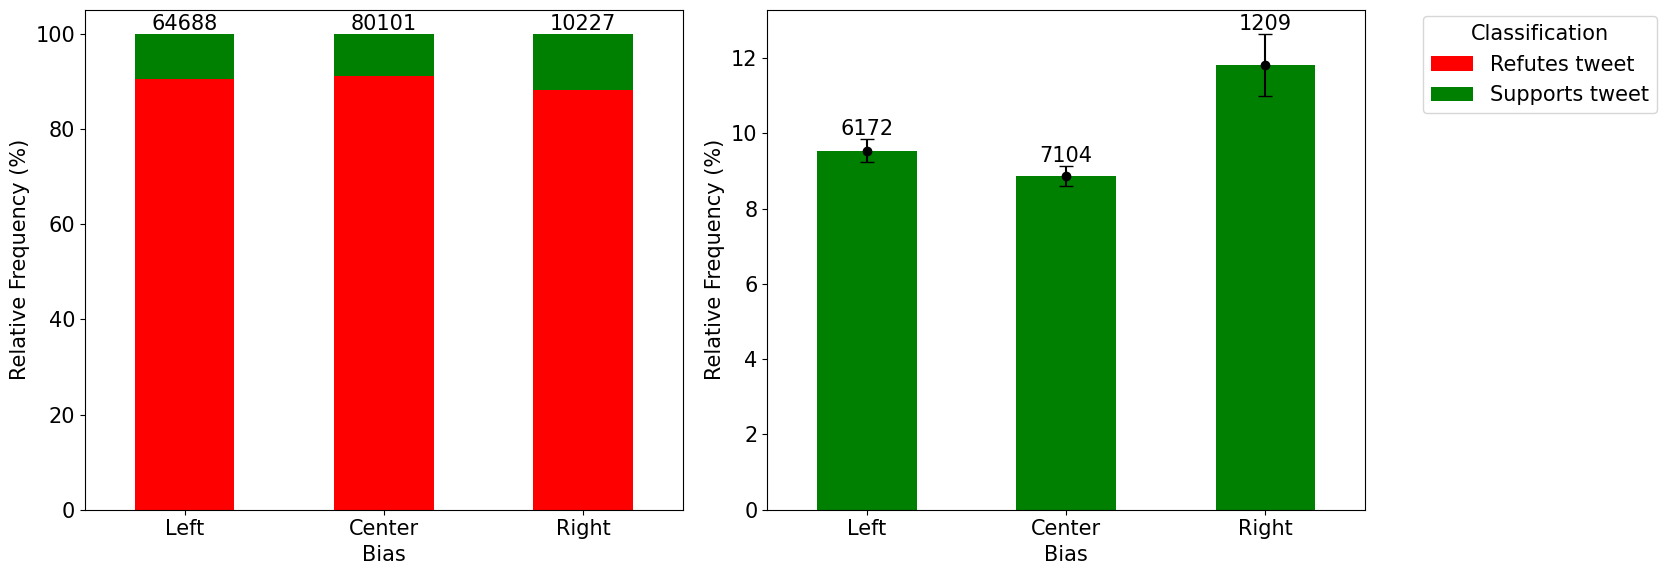

In [1265]:
from scipy.stats import norm

relative_freq_df = pd.crosstab(index=notes['bias_class'],
                               columns=notes['classification'],
                               normalize='index') * 100
count_df = pd.crosstab(index=notes['bias_class'], columns=notes['classification'])

colors = {'MISINFORMED_OR_POTENTIALLY_MISLEADING': 'red', 'NOT_MISLEADING': 'green'}

prettier_legend_names = {
    'MISINFORMED_OR_POTENTIALLY_MISLEADING': 'Refutes tweet',
    'NOT_MISLEADING': 'Supports tweet'
}

bias_order = ['Left', 'Center', 'Right']

relative_freq_df = relative_freq_df.reindex(bias_order)
count_df = count_df.reindex(bias_order)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

plt.rc('font', size=15)
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('legend', fontsize=15)
plt.rc('figure', titlesize=15)

relative_freq_df.plot(kind='bar', stacked=True, ax=axes[0], color=[colors[col] for col in relative_freq_df.columns])
axes[0].set_xlabel('Bias')
axes[0].set_ylabel('Relative Frequency (%)')
axes[0].tick_params(axis='x', rotation=0)
legend = axes[0].get_legend()
handles, labels = axes[0].get_legend_handles_labels()
prettier_labels = [prettier_legend_names[label] for label in labels]
if legend is not None:
    legend.remove()
fig.legend(handles, prettier_labels, title='Classification', bbox_to_anchor=(1.2, 0.97), loc='upper right')

for i, index_value in enumerate(relative_freq_df.index):
    total_count = count_df.loc[index_value].sum()
    axes[0].text(x=i, y=100, s=f'{total_count}', ha='center', va='bottom')

not_misleading_freq = relative_freq_df['NOT_MISLEADING']
not_misleading_freq.plot(kind='bar', ax=axes[1], color='green', label='NOT_MISLEADING')

p = not_misleading_freq / 100
n = count_df.sum(axis=1)
se = np.sqrt(p * (1 - p) / n)
ci = se * norm.ppf(0.995)
ci_lower = p - ci
ci_upper = p + ci

ci_lower *= 100
ci_upper *= 100

error = [not_misleading_freq - ci_lower, ci_upper - not_misleading_freq]

axes[1].errorbar(not_misleading_freq.index, not_misleading_freq, yerr=error, fmt='o', color='black', capsize=5)

for i, value in enumerate(not_misleading_freq):
    total_count = count_df['NOT_MISLEADING'][bias_order[i]]
    axes[1].text(x=i, y=value + error[1][i], s=f'{total_count}', ha='center', va='bottom')

axes[1].set_xlabel('Bias')
axes[1].set_ylabel('Relative Frequency (%)')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [1267]:
def classify_factuality(factuality_score):
    if factuality_score < 3:
        return "Low"
    elif factuality_score > 4:
        return "High"
    else:
        return "Medium"

notes['factuality_class'] = notes['factuality_score'].apply(classify_factuality)

In [1268]:
notes.head()

,noteId,noteAuthorParticipantId,createdAtMillis,tweetId,classification,believable,harmful,validationDifficulty,misleadingOther,misleadingFactualError,...,bias_score,factuality_score,currentStatus,participantId,enrollmentState,agree,disagree,agreement,bias_class,factuality_class
0,1537142913737428992,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1655318404027,1377030478167937024,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,...,0.50,3.00,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0,Center,Medium
1,1537204430730211328,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1655333070821,1537196168953974784,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,...,0.67,3.67,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0,Left,Medium
2,1540422295029551104,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1656100269455,1540087463099736065,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,...,1.00,3.00,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0,Left,Medium
3,1586769867381669889,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1667150391800,1586411168880807936,NOT_MISLEADING,NaN,NaN,NaN,0,0,...,1.00,3.50,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0,Left,Medium
4,1640795953472114688,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1680031214479,1640773789679230977,NOT_MISLEADING,NaN,NaN,NaN,0,0,...,0.50,4.00,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0,Center,Medium


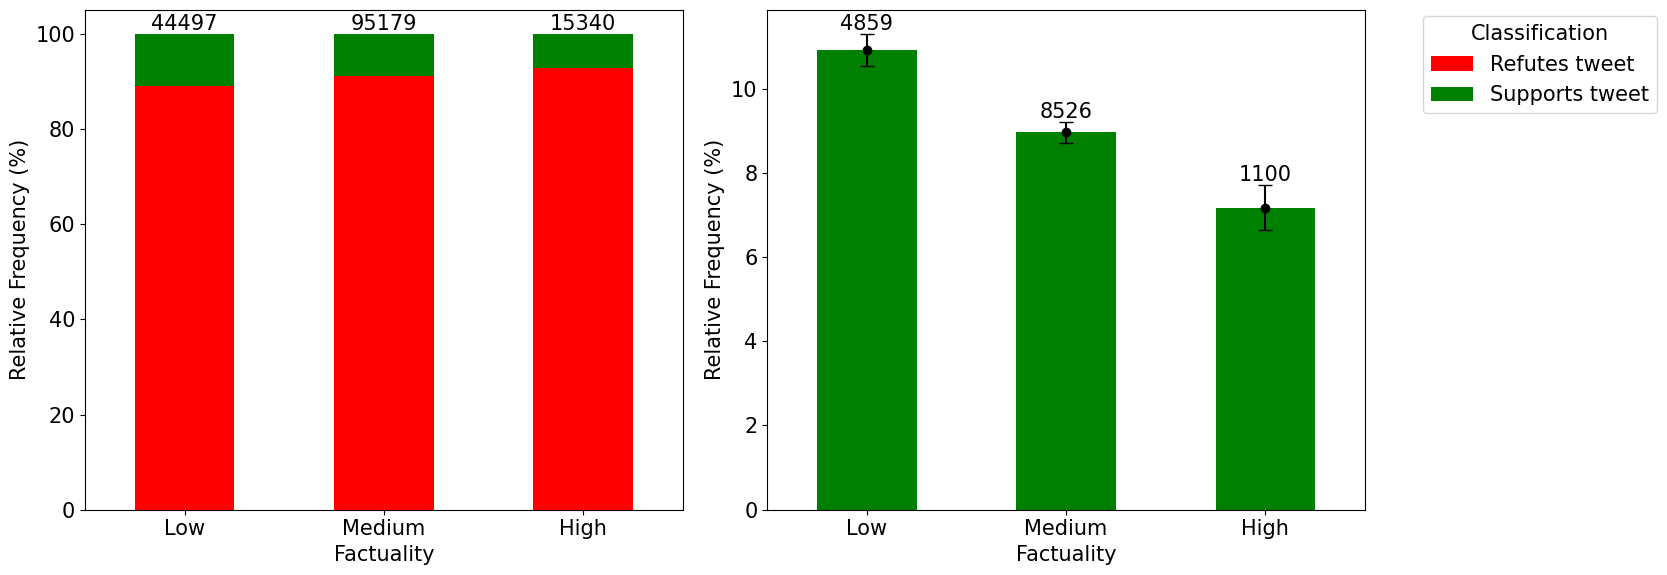

In [1269]:
relative_freq_df = pd.crosstab(index=notes['factuality_class'],
                               columns=notes['classification'],
                               normalize='index') * 100
count_df = pd.crosstab(index=notes['factuality_class'], columns=notes['classification'])

colors = {'MISINFORMED_OR_POTENTIALLY_MISLEADING': 'red', 'NOT_MISLEADING': 'green'}

prettier_legend_names = {
    'MISINFORMED_OR_POTENTIALLY_MISLEADING': 'Refutes tweet',
    'NOT_MISLEADING': 'Supports tweet'
}

factuality_order = ['Low', 'Medium', 'High']

relative_freq_df = relative_freq_df.reindex(factuality_order)
count_df = count_df.reindex(factuality_order)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

relative_freq_df.plot(kind='bar', stacked=True, ax=axes[0], color=[colors[col] for col in relative_freq_df.columns])
axes[0].set_xlabel('Factuality')
axes[0].set_ylabel('Relative Frequency (%)')
axes[0].tick_params(axis='x', rotation=0)
legend = axes[0].get_legend()
handles, labels = axes[0].get_legend_handles_labels()
prettier_labels = [prettier_legend_names[label] for label in labels]
if legend is not None:
    legend.remove()
fig.legend(handles, prettier_labels, title='Classification', bbox_to_anchor=(1.2, 0.97), loc='upper right')

for i, index_value in enumerate(relative_freq_df.index):
    total_count = count_df.loc[index_value].sum()
    axes[0].text(x=i, y=100, s=f'{total_count}', ha='center', va='bottom')

not_misleading_freq = relative_freq_df['NOT_MISLEADING']
not_misleading_freq.plot(kind='bar', ax=axes[1], color='green', label='NOT_MISLEADING')

p = not_misleading_freq / 100
n = count_df.sum(axis=1)
se = np.sqrt(p * (1 - p) / n)
ci = se * norm.ppf(0.995)
ci_lower = p - ci
ci_upper = p + ci

ci_lower *= 100
ci_upper *= 100

error = [not_misleading_freq - ci_lower, ci_upper - not_misleading_freq]

axes[1].errorbar(not_misleading_freq.index, not_misleading_freq, yerr=error, fmt='o', color='black', capsize=5)

for i, value in enumerate(not_misleading_freq):
    total_count = count_df['NOT_MISLEADING'][factuality_order[i]]
    axes[1].text(x=i, y=value + error[1][i], s=f'{total_count}', ha='center', va='bottom')

axes[1].set_xlabel('Factuality')
axes[1].set_ylabel('Relative Frequency (%)')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

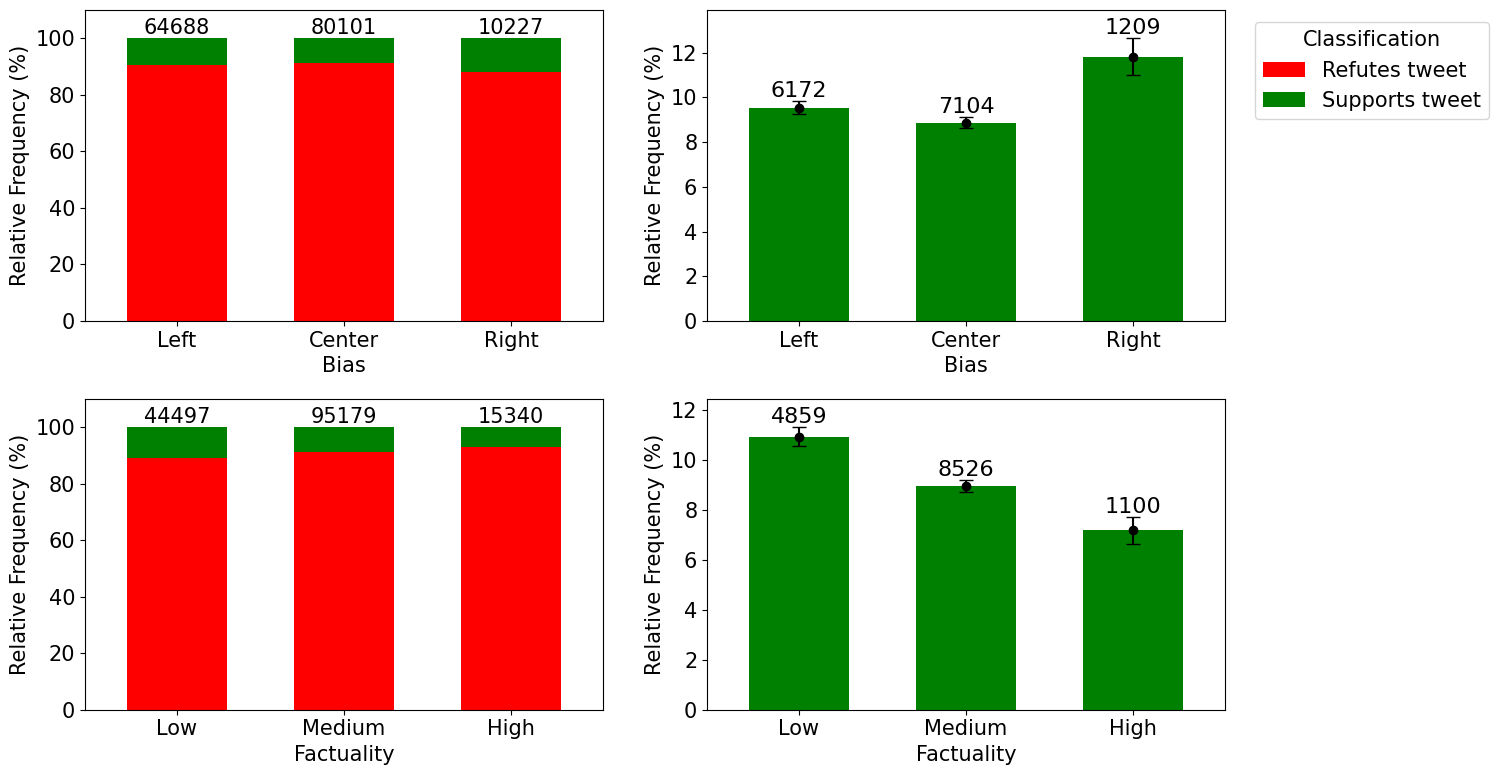

In [1271]:
relative_freq_df_bias = pd.crosstab(index=notes['bias_class'],
                                    columns=notes['classification'],
                                    normalize='index') * 100
count_df_bias = pd.crosstab(index=notes['bias_class'], columns=notes['classification'])
bias_order = ['Left', 'Center', 'Right']
relative_freq_df_bias = relative_freq_df_bias.reindex(bias_order)
count_df_bias = count_df_bias.reindex(bias_order)

relative_freq_df_factuality = pd.crosstab(index=notes['factuality_class'],
                                          columns=notes['classification'],
                                          normalize='index') * 100
count_df_factuality = pd.crosstab(index=notes['factuality_class'], columns=notes['classification'])
factuality_order = ['Low', 'Medium', 'High']
relative_freq_df_factuality = relative_freq_df_factuality.reindex(factuality_order)
count_df_factuality = count_df_factuality.reindex(factuality_order)

colors = {'MISINFORMED_OR_POTENTIALLY_MISLEADING': 'red', 'NOT_MISLEADING': 'green'}

prettier_legend_names = {
    'MISINFORMED_OR_POTENTIALLY_MISLEADING': 'Refutes tweet',
    'NOT_MISLEADING': 'Supports tweet'
}

prettier_labels = [prettier_legend_names[label] for label in labels]

def add_error_bars_and_annotations(ax, relative_freqs, counts, order):
    y_errors = []
    annotations = []
    for category in order:
        p = relative_freqs[category] / 100
        n = counts.sum(axis=1)[category]
        se = np.sqrt(p * (1 - p) / n)
        ci = se * norm.ppf(0.995)
        y_errors.append(ci * 100)
        annotations.append(counts["NOT_MISLEADING"][category])

    ax.errorbar(range(len(order)), relative_freqs[order], yerr=y_errors, fmt='o', color='black', capsize=5)

    for idx, (error, annotation) in enumerate(zip(y_errors, annotations)):
        ax.text(idx, relative_freqs[order][idx] + error, f'{annotation}', ha='center', va='bottom', fontsize=16)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

relative_freq_df_bias.plot(kind='bar', width=0.6, stacked=True, ax=axes[0, 0], color=[colors[col] for col in relative_freq_df_bias.columns])
for i, index_value in enumerate(relative_freq_df_bias.index):
    total_count = count_df_bias.loc[index_value].sum()
    axes[0, 0].text(x=i, y=100, s=f'{total_count}', ha='center', va='bottom')
axes[0, 0].set_xlabel('Bias')
axes[0, 0].set_ylabel('Relative Frequency (%)')
axes[0, 0].tick_params(axis='x', rotation=0)
axes[0, 0].margins(y=0.1)
axes[0, 0].get_legend().remove()

relative_freq_df_bias['NOT_MISLEADING'].plot(kind='bar', width=0.6, ax=axes[0, 1], color='green', label='Supports tweet')
axes[0, 1].set_xlabel('Bias')
axes[0, 1].set_ylabel('Relative Frequency (%)')
axes[0, 1].tick_params(axis='x', rotation=0)
axes[0, 1].margins(y=0.1)
add_error_bars_and_annotations(axes[0, 1], relative_freq_df_bias['NOT_MISLEADING'], count_df_bias, bias_order)

relative_freq_df_factuality.plot(kind='bar', width=0.6, stacked=True, ax=axes[1, 0], color=[colors[col] for col in relative_freq_df_factuality.columns])
for i, index_value in enumerate(relative_freq_df_factuality.index):
    total_count = count_df_factuality.loc[index_value].sum()
    axes[1, 0].text(x=i, y=100, s=f'{total_count}', ha='center', va='bottom')
axes[1, 0].set_xlabel('Factuality')
axes[1, 0].set_ylabel('Relative Frequency (%)')
axes[1, 0].tick_params(axis='x', rotation=0)
axes[1, 0].margins(y=0.1)
axes[1, 0].get_legend().remove()

relative_freq_df_factuality['NOT_MISLEADING'].plot(kind='bar', width=0.6, ax=axes[1, 1], color='green', label='Supports tweet')
axes[1, 1].set_xlabel('Factuality')
axes[1, 1].set_ylabel('Relative Frequency (%)')
axes[1, 1].tick_params(axis='x', rotation=0)
axes[1, 1].margins(y=0.1)
add_error_bars_and_annotations(axes[1, 1], relative_freq_df_factuality['NOT_MISLEADING'], count_df_factuality, factuality_order)

fig.legend(handles, prettier_labels, title='Classification', bbox_to_anchor=(1.08, 0.97), loc='upper right')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

## Plotting Factuality scores against bias classes

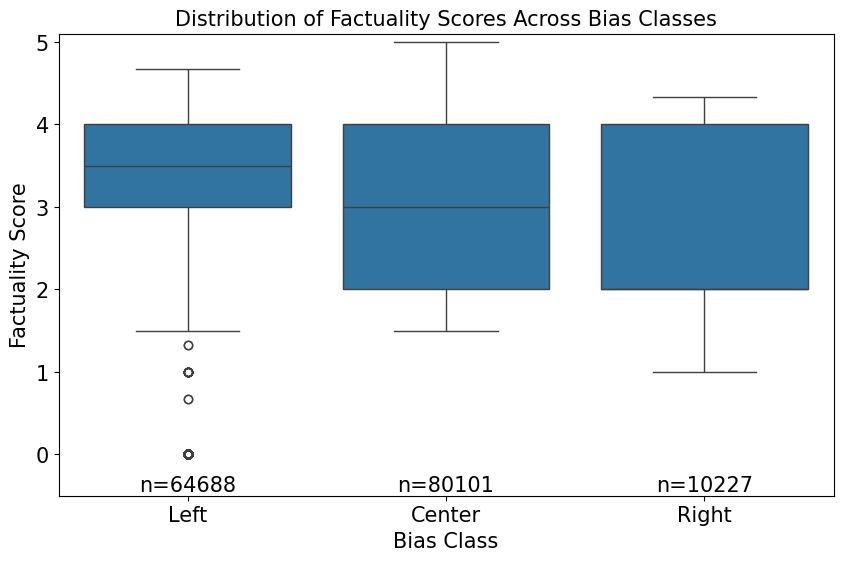

In [1272]:
bias_order = ['Left', 'Center', 'Right']

plt.figure(figsize=(10, 6))
sns.boxplot(data=notes, x='bias_class', y="factuality_score", order=bias_order)

counts = notes['bias_class'].value_counts().reindex(bias_order)

for i, bias in enumerate(bias_order):
    plt.text(i, notes['factuality_score'].min() - (notes['factuality_score'].max() - notes['factuality_score'].min()) * 0.05, f'n={counts[bias]}', ha='center', va='top')

plt.title('Distribution of Factuality Scores Across Bias Classes')
plt.xlabel('Bias Class')
plt.ylabel('Factuality Score')
plt.ylim(notes['factuality_score'].min() - (notes['factuality_score'].max() - notes['factuality_score'].min()) * 0.1, notes['factuality_score'].max() + 0.1)
plt.show()

## Visualizing helpfulness feature of notes

In [1273]:
notes.head()

,noteId,noteAuthorParticipantId,createdAtMillis,tweetId,classification,believable,harmful,validationDifficulty,misleadingOther,misleadingFactualError,...,bias_score,factuality_score,currentStatus,participantId,enrollmentState,agree,disagree,agreement,bias_class,factuality_class
0,1537142913737428992,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1655318404027,1377030478167937024,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,...,0.50,3.00,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0,Center,Medium
1,1537204430730211328,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1655333070821,1537196168953974784,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,...,0.67,3.67,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0,Left,Medium
2,1540422295029551104,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1656100269455,1540087463099736065,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,...,1.00,3.00,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0,Left,Medium
3,1586769867381669889,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1667150391800,1586411168880807936,NOT_MISLEADING,NaN,NaN,NaN,0,0,...,1.00,3.50,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0,Left,Medium
4,1640795953472114688,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1680031214479,1640773789679230977,NOT_MISLEADING,NaN,NaN,NaN,0,0,...,0.50,4.00,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0,Center,Medium


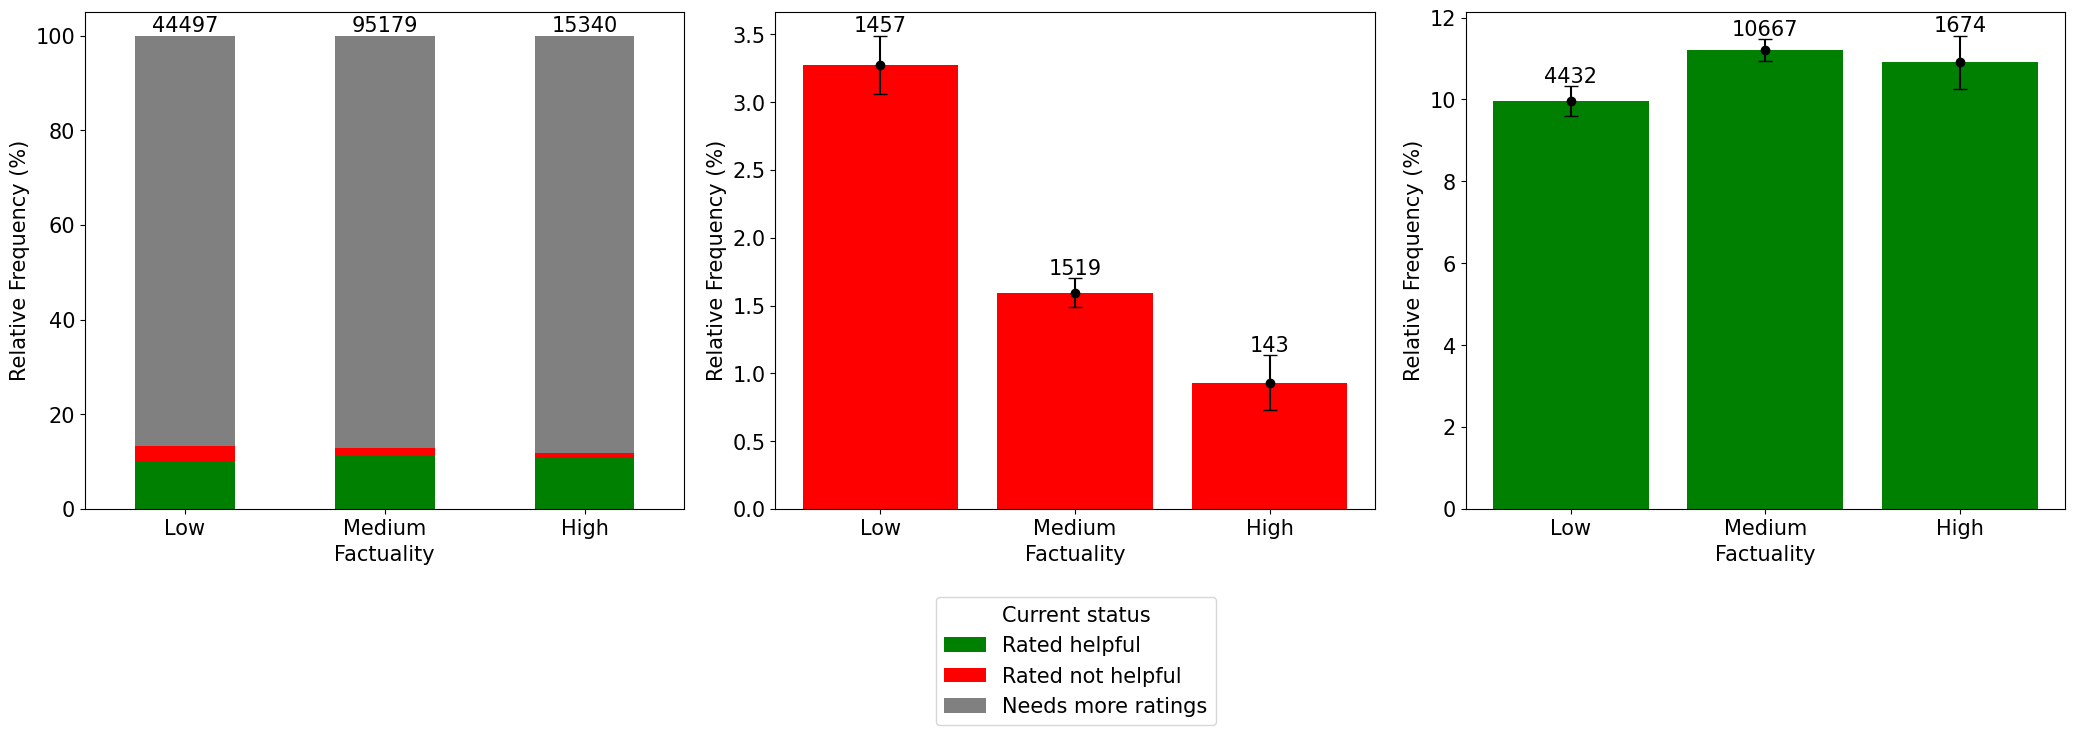

In [1274]:
relative_freq_df = pd.crosstab(index=notes['factuality_class'],
                               columns=notes['currentStatus'],
                               normalize='index') * 100

count_df = pd.crosstab(index=notes['factuality_class'], columns=notes['currentStatus'])

colors = {'NEEDS_MORE_RATINGS': 'gray', 'CURRENTLY_RATED_HELPFUL': 'green', 'CURRENTLY_RATED_NOT_HELPFUL': 'red'}

prettier_legend_names = {
    'NEEDS_MORE_RATINGS': 'Needs more ratings',
    'CURRENTLY_RATED_HELPFUL': 'Rated helpful',
    'CURRENTLY_RATED_NOT_HELPFUL': 'Rated not helpful'
}

factuality_order = ['Low', 'Medium', 'High']

relative_freq_df = relative_freq_df.reindex(factuality_order)
count_df = count_df.reindex(factuality_order)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 6))

relative_freq_df.plot(kind='bar', stacked=True, ax=axes[0], color=[colors[col] for col in relative_freq_df.columns])
axes[0].set_xlabel('Factuality')
axes[0].set_ylabel('Relative Frequency (%)')
axes[0].tick_params(axis='x', rotation=0)
legend = axes[0].get_legend()
handles, labels = axes[0].get_legend_handles_labels()
prettier_labels = [prettier_legend_names[label] for label in labels]
if legend is not None:
    legend.remove()
fig.legend(handles, prettier_labels,title='Current status', bbox_to_anchor=(0.59, 0), loc='upper right')
for i, index_value in enumerate(relative_freq_df.index):
    total_count = count_df.loc[index_value].sum()
    axes[0].text(x=i, y=100, s=f'{total_count}', ha='center', va='bottom')

not_helpful_freq = relative_freq_df['CURRENTLY_RATED_NOT_HELPFUL']
p = not_helpful_freq / 100
n = count_df.sum(axis=1)
se = np.sqrt(p * (1 - p) / n)
ci = se * norm.ppf(0.995)
ci_lower = p - ci
ci_upper = p + ci

ci_lower *= 100
ci_upper *= 100

error = [not_helpful_freq - ci_lower, ci_upper - not_helpful_freq]
axes[1].bar(not_helpful_freq.index, not_helpful_freq, color='red', label='CURRENTLY_RATED_NOT_HELPFUL')
axes[1].errorbar(not_helpful_freq.index, not_helpful_freq, yerr=error, fmt='o', color='black', capsize=5)

for i, value in enumerate(not_helpful_freq):
    total_count = count_df['CURRENTLY_RATED_NOT_HELPFUL'][factuality_order[i]]
    axes[1].text(x=i, y=value + error[1][i], s=f'{total_count}', ha='center', va='bottom')

axes[1].set_xlabel('Factuality')
axes[1].set_ylabel('Relative Frequency (%)')

helpful_freq = relative_freq_df['CURRENTLY_RATED_HELPFUL']
p = helpful_freq / 100
n = count_df.sum(axis=1)
se = np.sqrt(p * (1 - p) / n)
ci = se * norm.ppf(0.995)
ci_lower = p - ci
ci_upper = p + ci

ci_lower *= 100
ci_upper *= 100

error = [helpful_freq - ci_lower, ci_upper - helpful_freq]
axes[2].bar(helpful_freq.index, helpful_freq, color='green', label='CURRENTLY_RATED_HELPFUL')
axes[2].errorbar(helpful_freq.index, helpful_freq, yerr=error, fmt='o', color='black', capsize=5)

for i, value in enumerate(helpful_freq):
    total_count = count_df['CURRENTLY_RATED_HELPFUL'][factuality_order[i]]
    axes[2].text(x=i, y=value + error[1][i], s=f'{total_count}', ha='center', va='bottom')

axes[2].set_xlabel('Factuality')
axes[2].set_ylabel('Relative Frequency (%)')

plt.tight_layout()
plt.show()

In [1276]:
def calculate_ci(proportion, total_count, confidence_level=0.99):
    se = np.sqrt(proportion * (1 - proportion) / total_count)
    z = norm.ppf((1 + confidence_level) / 2)
    ci_width = se * z
    return ci_width * 100

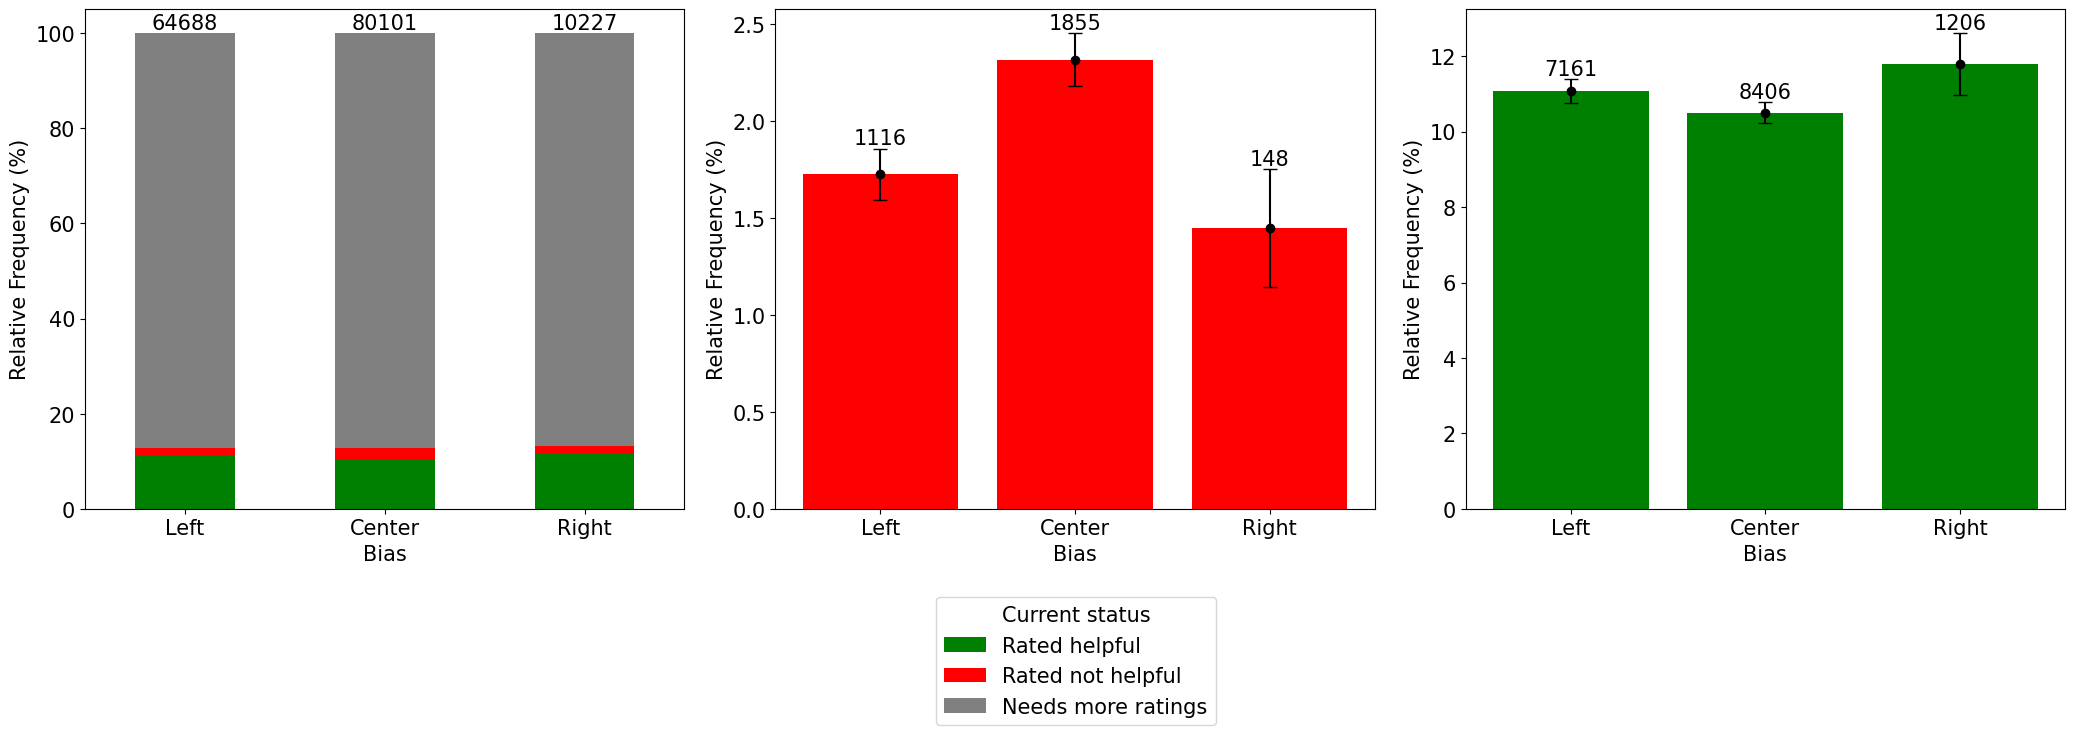

In [1277]:
relative_freq_df = pd.crosstab(index=notes['bias_class'],
                               columns=notes['currentStatus'],
                               normalize='index') * 100

count_df = pd.crosstab(index=notes['bias_class'], columns=notes['currentStatus'])

colors = {'NEEDS_MORE_RATINGS': 'gray', 'CURRENTLY_RATED_HELPFUL': 'green', 'CURRENTLY_RATED_NOT_HELPFUL': 'red'}

prettier_legend_names = {
    'NEEDS_MORE_RATINGS': 'Needs more ratings',
    'CURRENTLY_RATED_HELPFUL': 'Rated helpful',
    'CURRENTLY_RATED_NOT_HELPFUL': 'Rated not helpful'
}

bias_order = ['Left', 'Center', 'Right']

relative_freq_df = relative_freq_df.reindex(bias_order)
count_df = count_df.reindex(bias_order)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 6))

relative_freq_df.plot(kind='bar', stacked=True, ax=axes[0], color=[colors[col] for col in relative_freq_df.columns])
axes[0].set_xlabel('Bias')
axes[0].set_ylabel('Relative Frequency (%)')
axes[0].tick_params(axis='x', rotation=0)
legend = axes[0].get_legend()
handles, labels = axes[0].get_legend_handles_labels()
prettier_labels = [prettier_legend_names[label] for label in labels]
if legend is not None:
    legend.remove()
fig.legend(handles, prettier_labels,title='Current status', bbox_to_anchor=(0.59, 0), loc='upper right')
for i, index_value in enumerate(relative_freq_df.index):
    total_count = count_df.loc[index_value].sum()
    axes[0].text(x=i, y=100, s=f'{total_count}', ha='center', va='bottom')

not_helpful_freq = relative_freq_df['CURRENTLY_RATED_NOT_HELPFUL']
p = not_helpful_freq / 100
n = count_df.sum(axis=1)
se = np.sqrt(p * (1 - p) / n)
ci = se * norm.ppf(0.995)
ci_lower = p - ci
ci_upper = p + ci

ci_lower *= 100
ci_upper *= 100

error = [not_helpful_freq - ci_lower, ci_upper - not_helpful_freq]
axes[1].bar(not_helpful_freq.index, not_helpful_freq, color='red', label='CURRENTLY_RATED_NOT_HELPFUL')
axes[1].errorbar(not_helpful_freq.index, not_helpful_freq, yerr=error, fmt='o', color='black', capsize=5)

for i, value in enumerate(not_helpful_freq):
    total_count = count_df['CURRENTLY_RATED_NOT_HELPFUL'][bias_order[i]]
    axes[1].text(x=i, y=value + error[1][i], s=f'{total_count}', ha='center', va='bottom')

axes[1].set_xlabel('Bias')
axes[1].set_ylabel('Relative Frequency (%)')

helpful_freq = relative_freq_df['CURRENTLY_RATED_HELPFUL']
p = helpful_freq / 100
n = count_df.sum(axis=1)
se = np.sqrt(p * (1 - p) / n)
ci = se * norm.ppf(0.995)
ci_lower = p - ci
ci_upper = p + ci

ci_lower *= 100
ci_upper *= 100

error = [helpful_freq - ci_lower, ci_upper - helpful_freq]
axes[2].bar(helpful_freq.index, helpful_freq, color='green', label='CURRENTLY_RATED_HELPFUL')
axes[2].errorbar(helpful_freq.index, helpful_freq, yerr=error, fmt='o', color='black', capsize=5)

for i, value in enumerate(helpful_freq):
    total_count = count_df['CURRENTLY_RATED_HELPFUL'][bias_order[i]]
    axes[2].text(x=i, y=value + error[1][i], s=f'{total_count}', ha='center', va='bottom')

axes[2].set_xlabel('Bias')
axes[2].set_ylabel('Relative Frequency (%)')

plt.tight_layout()
plt.show()

In [ ]:
relative_freq_df_factuality = pd.crosstab(index=notes['factuality_class'],
                                          columns=notes['currentStatus'],
                                          normalize='index') * 100
count_df_factuality = pd.crosstab(index=notes['factuality_class'], columns=notes['currentStatus'])
factuality_order = ['Low', 'Medium', 'High']
relative_freq_df_factuality = relative_freq_df_factuality.reindex(factuality_order)
count_df_factuality = count_df_factuality.reindex(factuality_order)

relative_freq_df_bias = pd.crosstab(index=notes['bias_class'],
                                    columns=notes['currentStatus'],
                                    normalize='index') * 100
count_df_bias = pd.crosstab(index=notes['bias_class'], columns=notes['currentStatus'])
bias_order = ['Left', 'Center', 'Right']
relative_freq_df_bias = relative_freq_df_bias.reindex(bias_order)
count_df_bias = count_df_bias.reindex(bias_order)

statuses = ['NEEDS_MORE_RATINGS', 'CURRENTLY_RATED_NOT_HELPFUL', 'CURRENTLY_RATED_HELPFUL']
colors = {'NEEDS_MORE_RATINGS': 'gray', 'CURRENTLY_RATED_HELPFUL': 'green', 'CURRENTLY_RATED_NOT_HELPFUL': 'red'}
prettier_legend_names = {
    'NEEDS_MORE_RATINGS': 'Needs more ratings',
    'CURRENTLY_RATED_HELPFUL': 'Rated helpful',
    'CURRENTLY_RATED_NOT_HELPFUL': 'Rated not helpful'
}

def add_error_bars_and_annotations(ax, relative_freqs, counts, order, status):
    color = colors[status]
    y_values = []
    y_errors_upper = []
    y_errors_lower = []
    for category in order:
        p = relative_freqs.at[category, status] / 100
        n = counts.sum(axis=1)[category]
        se = np.sqrt(p * (1 - p) / n)
        ci = se * norm.ppf(0.995)
        error = ci * 100
        y_values.append(relative_freqs.at[category, status])
        y_errors_upper.append(error)
        y_errors_lower.append(error)

    y_errors = [y_errors_lower, y_errors_upper]

    ax.bar(order, y_values, width=0.6, color=color, label=prettier_legend_names[status])

    ax.errorbar(range(len(order)), y_values, yerr=y_errors, fmt='o', color='black', capsize=5)

    for idx, (value, annotation) in enumerate(zip(y_values, counts[status])):
        ax.text(idx, value + y_errors_upper[idx], f'{annotation}', ha='center', va='bottom', fontsize=16)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

relative_freq_df_factuality.plot(kind='bar', width=0.6, stacked=True, ax=axes[0, 0], color=[colors[col] for col in relative_freq_df_factuality.columns])
axes[0, 0].set_xlabel('Factuality')
axes[0, 0].set_ylabel('Relative Frequency (%)')
axes[0, 0].tick_params(axis='x', rotation=0)
axes[0, 0].margins(y=0.1)
axes[0, 0].get_legend().remove()
for i, index_value in enumerate(relative_freq_df_factuality.index):
    total_count = count_df_factuality.loc[index_value].sum()
    axes[0,0].text(x=i, y=100, s=f'{total_count}', ha='center', va='bottom')

axes[0, 1].set_xlabel('Factuality')
axes[0, 1].set_ylabel('Relative Frequency (%)')
axes[0, 1].tick_params(axis='x', rotation=0)
axes[0, 1].margins(y=0.1)

axes[0, 2].set_xlabel('Factuality')
axes[0, 2].set_ylabel('Relative Frequency (%)')
axes[0, 2].tick_params(axis='x', rotation=0)
axes[0, 2].margins(y=0.1)

for status, ax in zip(statuses[1:], axes[0, 1:]):
    add_error_bars_and_annotations(ax, relative_freq_df_factuality, count_df_factuality, factuality_order, status)

relative_freq_df_bias.plot(kind='bar', width=0.6, stacked=True, ax=axes[1, 0], color=[colors[col] for col in relative_freq_df_bias.columns])
axes[1, 0].set_xlabel('Bias')
axes[1, 0].set_ylabel('Relative Frequency (%)')
axes[1, 0].tick_params(axis='x', rotation=0)
axes[1, 0].margins(y=0.1)
axes[1, 0].get_legend().remove()
for i, index_value in enumerate(relative_freq_df_bias.index):
    total_count = count_df_bias.loc[index_value].sum()
    axes[1,0].text(x=i, y=100, s=f'{total_count}', ha='center', va='bottom')

axes[1, 1].set_xlabel('Bias')
axes[1, 1].set_ylabel('Relative Frequency (%)')
axes[1, 1].tick_params(axis='x', rotation=0)
axes[1, 1].margins(y=0.1)

axes[1, 2].set_xlabel('Bias')
axes[1, 2].set_ylabel('Relative Frequency (%)')
axes[1, 2].tick_params(axis='x', rotation=0)
axes[1, 2].margins(y=0.1)

for status, ax in zip(statuses[1:], axes[1, 1:]):
    add_error_bars_and_annotations(ax, relative_freq_df_bias, count_df_bias, bias_order, status)

handles, labels = axes[0, 0].get_legend_handles_labels()
corrected_labels = []
for label in labels:
    if label in prettier_legend_names:
        corrected_labels.append(prettier_legend_names[label])
    else:
        corrected_labels.append(label)

fig.legend(handles, corrected_labels, title='Current status', loc='lower right', bbox_to_anchor=(0.515, -0.18))

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

## Visualizing enrollment status feature of notes

In [1279]:
notes.head()

,noteId,noteAuthorParticipantId,createdAtMillis,tweetId,classification,believable,harmful,validationDifficulty,misleadingOther,misleadingFactualError,...,bias_score,factuality_score,currentStatus,participantId,enrollmentState,agree,disagree,agreement,bias_class,factuality_class
0,1537142913737428992,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1655318404027,1377030478167937024,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,...,0.50,3.00,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0,Center,Medium
1,1537204430730211328,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1655333070821,1537196168953974784,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,...,0.67,3.67,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0,Left,Medium
2,1540422295029551104,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1656100269455,1540087463099736065,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,...,1.00,3.00,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0,Left,Medium
3,1586769867381669889,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1667150391800,1586411168880807936,NOT_MISLEADING,NaN,NaN,NaN,0,0,...,1.00,3.50,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0,Left,Medium
4,1640795953472114688,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1680031214479,1640773789679230977,NOT_MISLEADING,NaN,NaN,NaN,0,0,...,0.50,4.00,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0,Center,Medium


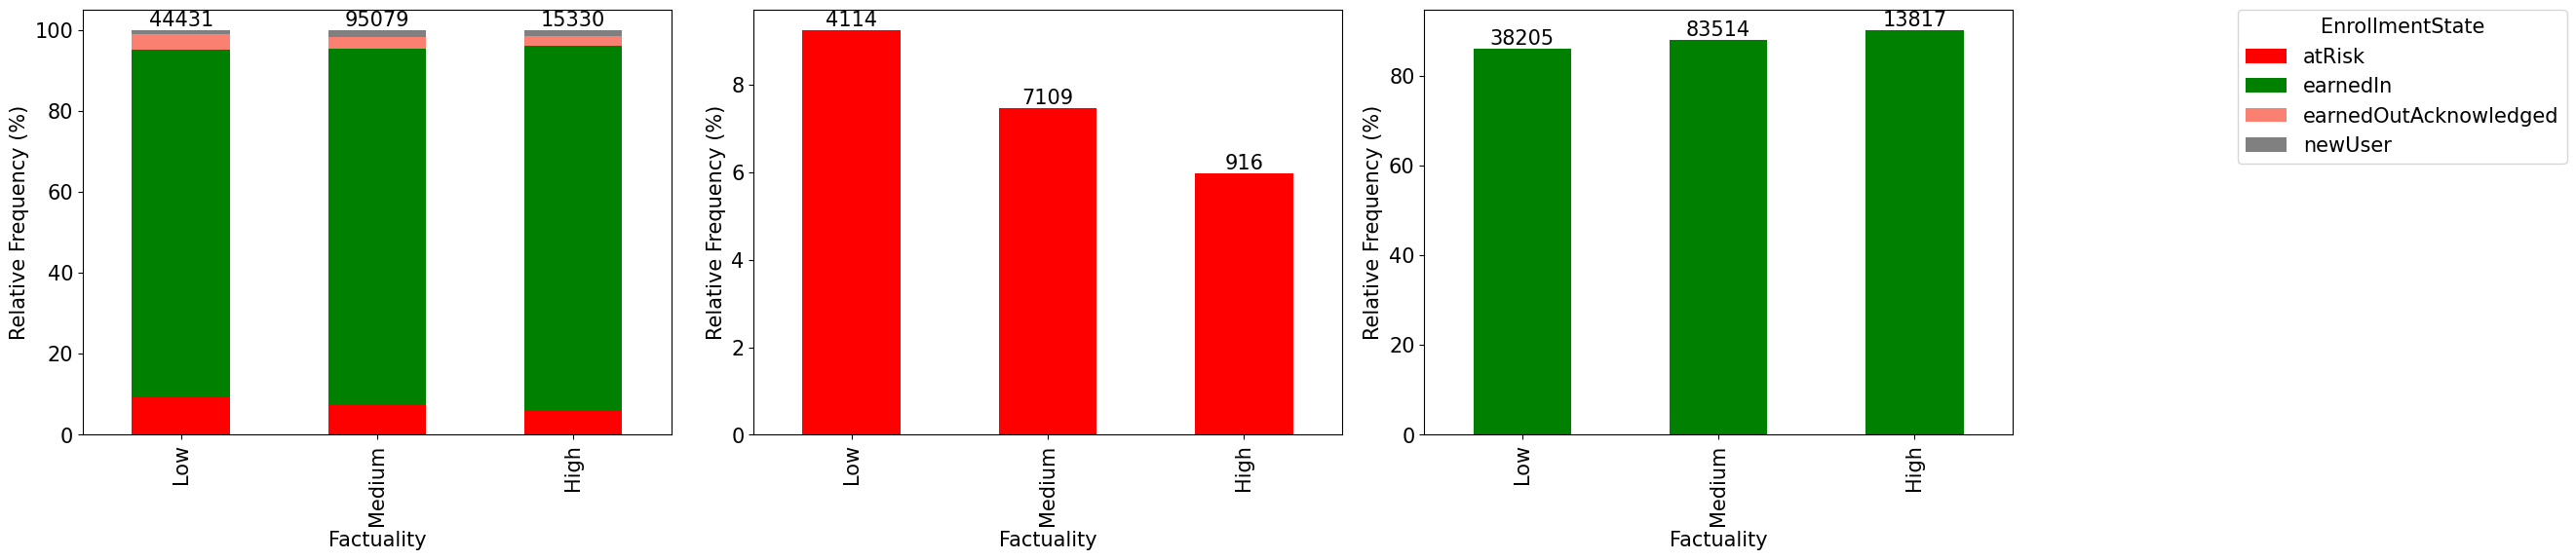

In [1280]:
relative_freq_df = pd.crosstab(index=notes['factuality_class'],
                               columns=notes['enrollmentState'],
                               normalize='index') * 100

count_df = pd.crosstab(index=notes['factuality_class'], columns=notes['enrollmentState'])

colors = {'newUser': 'gray', 'earnedIn': 'green', 'atRisk': 'red', 'earnedOutAcknowledged': 'salmon', 'earnedOutNoAcknowledged:': 'yellow'}

factuality_order = ['Low', 'Medium', 'High']

relative_freq_df = relative_freq_df.reindex(factuality_order)

ccount_df = pd.crosstab(index=notes['factuality_class'], columns=notes['enrollmentState'])
count_df = count_df.reindex(factuality_order)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 6))

relative_freq_df.plot(kind='bar', stacked=True, ax=axes[0], color=[colors[col] for col in relative_freq_df.columns])
legend = axes[0].get_legend()
if legend is not None:
    legend.remove()
fig.legend(title='EnrollmentState', bbox_to_anchor=(1.265, 0.98), loc='upper right')
for i, index_value in enumerate(relative_freq_df.index):
    total_count = count_df.loc[index_value].sum()
    axes[0].text(x=i, y=100, s=f'{total_count}', ha='center', va='bottom')
axes[0].set_xlabel('Factuality')
axes[0].set_ylabel('Relative Frequency (%)')

not_helpful_freq = relative_freq_df['atRisk']
not_helpful_freq.plot(kind='bar', ax=axes[1], color='red')
for i, value in enumerate(not_helpful_freq):
    total_count = count_df['atRisk'][factuality_order[i]]
    axes[1].text(x=i, y=value, s=f'{total_count}', ha='center', va='bottom')
axes[1].set_xlabel('Factuality')
axes[1].set_ylabel('Relative Frequency (%)')

helpful_freq = relative_freq_df['earnedIn']
helpful_freq.plot(kind='bar', ax=axes[2], color='green')
for i, value in enumerate(helpful_freq):
    total_count = count_df['earnedIn'][factuality_order[i]]
    axes[2].text(x=i, y=value, s=f'{total_count}', ha='center', va='bottom')
axes[2].set_xlabel('Factuality')
axes[2].set_ylabel('Relative Frequency (%)')

plt.tight_layout()
plt.show()

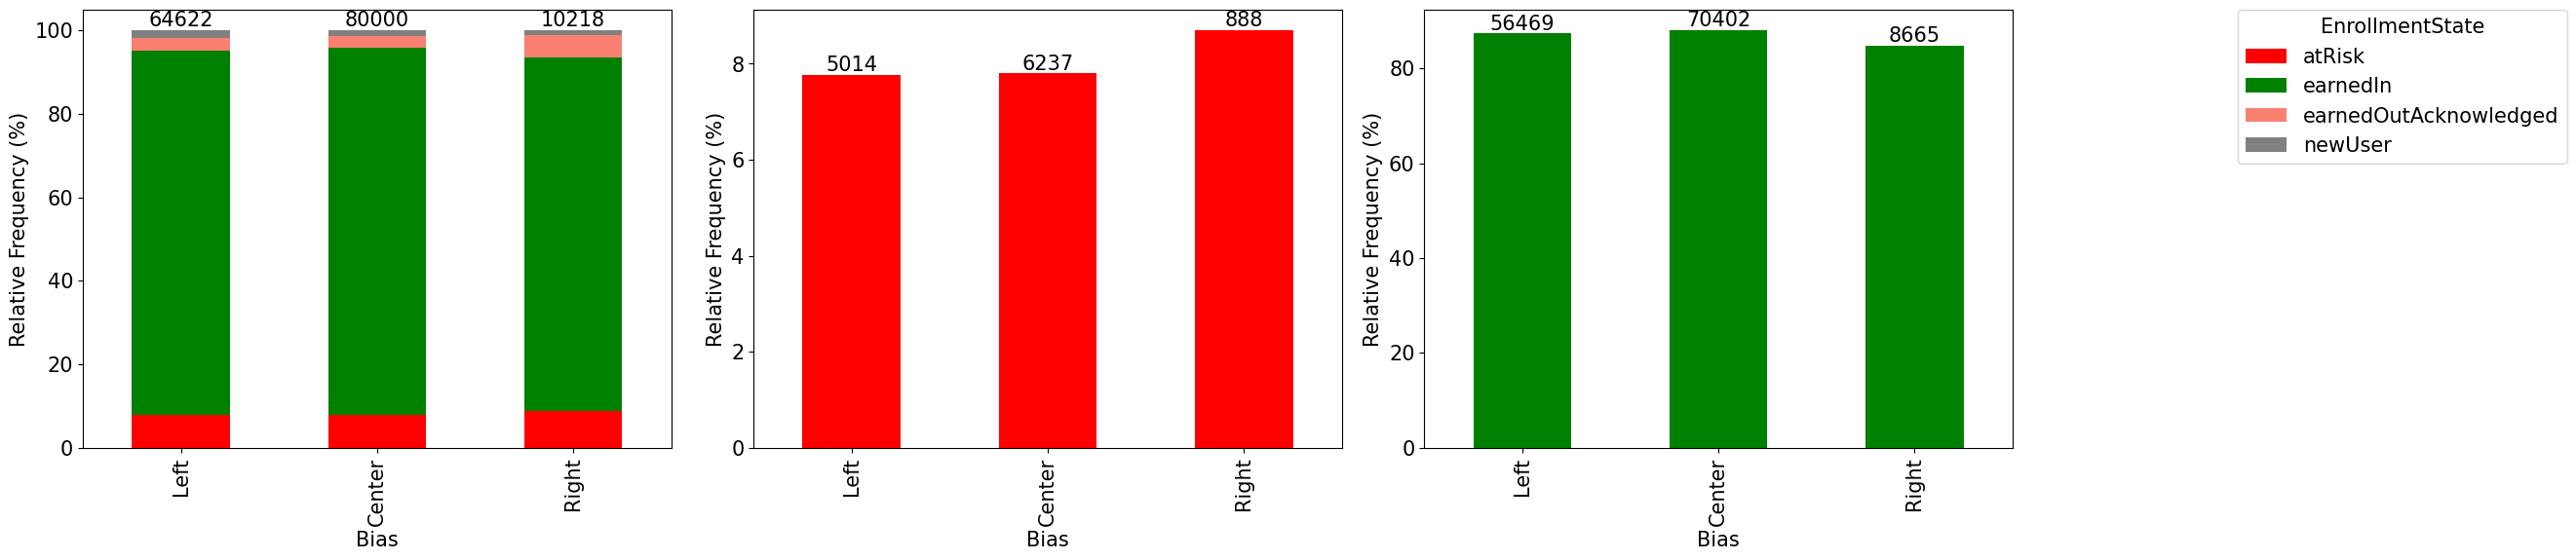

In [1281]:
relative_freq_df = pd.crosstab(index=notes['bias_class'],
                               columns=notes['enrollmentState'],
                               normalize='index') * 100

count_df = pd.crosstab(index=notes['bias_class'], columns=notes['enrollmentState'])

colors = {'newUser': 'gray', 'earnedIn': 'green', 'atRisk': 'red', 'earnedOutAcknowledged': 'salmon', 'earnedOutNoAcknowledged:': 'yellow'}

bias_order = ['Left', 'Center', 'Right']

relative_freq_df = relative_freq_df.reindex(bias_order)

ccount_df = pd.crosstab(index=notes['bias_class'], columns=notes['enrollmentState'])
count_df = count_df.reindex(bias_order)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 6))

relative_freq_df.plot(kind='bar', stacked=True, ax=axes[0], color=[colors[col] for col in relative_freq_df.columns])
legend = axes[0].get_legend()
if legend is not None:
    legend.remove()
fig.legend(title='EnrollmentState', bbox_to_anchor=(1.265, 0.98), loc='upper right')
for i, index_value in enumerate(relative_freq_df.index):
    total_count = count_df.loc[index_value].sum()
    axes[0].text(x=i, y=100, s=f'{total_count}', ha='center', va='bottom')
axes[0].set_xlabel('Bias')
axes[0].set_ylabel('Relative Frequency (%)')

not_helpful_freq = relative_freq_df['atRisk']
not_helpful_freq.plot(kind='bar', ax=axes[1], color='red')
for i, value in enumerate(not_helpful_freq):
    total_count = count_df['atRisk'][bias_order[i]]
    axes[1].text(x=i, y=value, s=f'{total_count}', ha='center', va='bottom')
axes[1].set_xlabel('Bias')
axes[1].set_ylabel('Relative Frequency (%)')

helpful_freq = relative_freq_df['earnedIn']
helpful_freq.plot(kind='bar', ax=axes[2], color='green')
for i, value in enumerate(helpful_freq):
    total_count = count_df['earnedIn'][bias_order[i]]
    axes[2].text(x=i, y=value, s=f'{total_count}', ha='center', va='bottom')
axes[2].set_xlabel('Bias')
axes[2].set_ylabel('Relative Frequency (%)')

plt.tight_layout()
plt.show()

## Visualizing agreement feature of notes

In [1282]:
notes.head()

,noteId,noteAuthorParticipantId,createdAtMillis,tweetId,classification,believable,harmful,validationDifficulty,misleadingOther,misleadingFactualError,...,bias_score,factuality_score,currentStatus,participantId,enrollmentState,agree,disagree,agreement,bias_class,factuality_class
0,1537142913737428992,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1655318404027,1377030478167937024,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,...,0.50,3.00,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0,Center,Medium
1,1537204430730211328,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1655333070821,1537196168953974784,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,...,0.67,3.67,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0,Left,Medium
2,1540422295029551104,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1656100269455,1540087463099736065,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,...,1.00,3.00,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0,Left,Medium
3,1586769867381669889,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1667150391800,1586411168880807936,NOT_MISLEADING,NaN,NaN,NaN,0,0,...,1.00,3.50,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0,Left,Medium
4,1640795953472114688,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1680031214479,1640773789679230977,NOT_MISLEADING,NaN,NaN,NaN,0,0,...,0.50,4.00,NEEDS_MORE_RATINGS,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,0.0,0.0,0.0,Center,Medium


<ipython-input-1283-9e5ad2c64e87>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=notes_filtered, x='factuality_class', y="agreement", order=factuality_order, palette=colors)


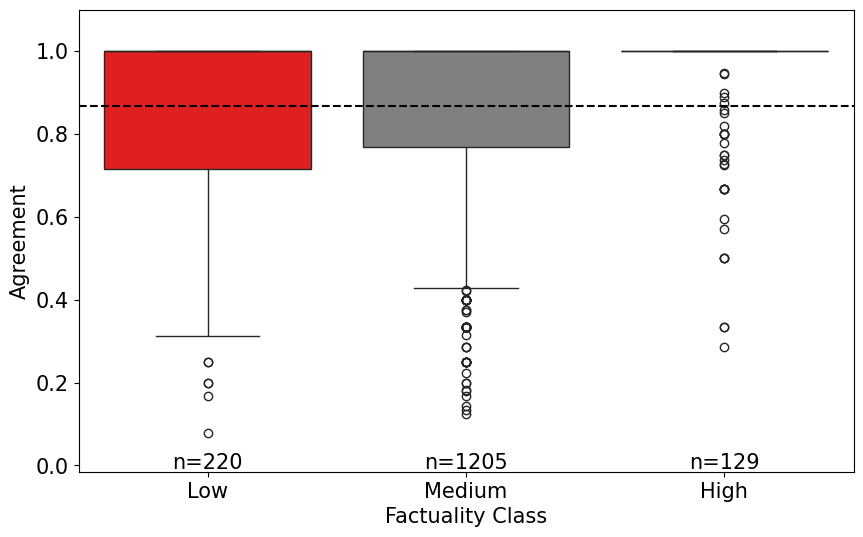

In [1283]:
factuality_order = ['Low', 'Medium', 'High']
colors = {'Low': 'red', 'Medium': 'gray', 'High': 'green'}

notes_filtered = notes[notes['agreement'] > 0]

average_agreement = notes_filtered['agreement'].mean()

plt.figure(figsize=(10, 6))
sns.boxplot(data=notes_filtered, x='factuality_class', y="agreement", order=factuality_order, palette=colors)

plt.axhline(average_agreement, color='black', linestyle='--')

counts = notes_filtered['factuality_class'].value_counts().reindex(factuality_order)

for i, factuality in enumerate(factuality_order):
    plt.text(i, notes_filtered['agreement'].min() - (notes_filtered['agreement'].max() - notes_filtered['agreement'].min()) * 0.05, f'n={counts[factuality]}', ha='center', va='top')

plt.xlabel('Factuality Class')
plt.ylabel('Agreement')
plt.ylim(notes_filtered['agreement'].min() - (notes_filtered['agreement'].max() - notes_filtered['agreement'].min()) * 0.1, notes_filtered['agreement'].max() + 0.1)
plt.show()

<ipython-input-1284-a00ebaee83e9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=notes_filtered, x='bias_class', y="agreement", order=bias_order, palette=colors)


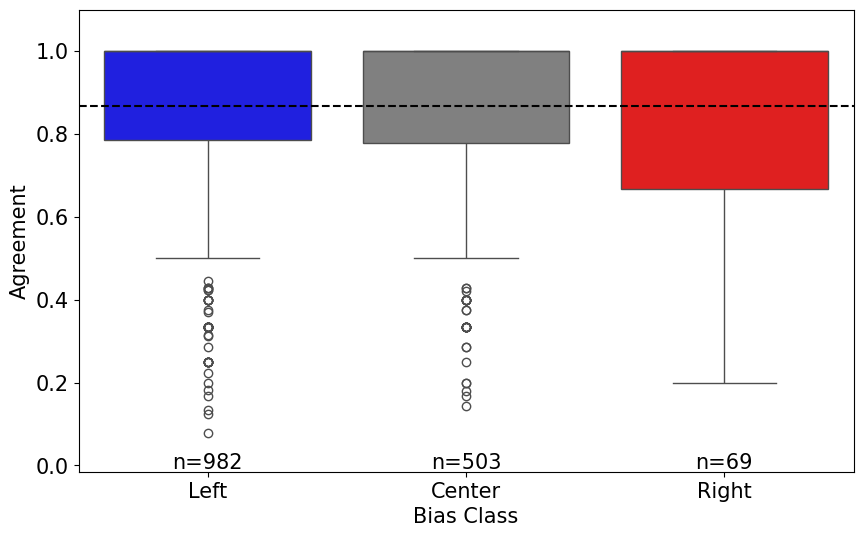

In [1284]:
bias_order = ['Left', 'Center', 'Right']
colors = {'Left': 'blue', 'Center': 'gray', 'Right': 'red'}

notes_filtered = notes[notes['agreement'] > 0]

average_agreement = notes_filtered['agreement'].mean()

plt.figure(figsize=(10, 6))
sns.boxplot(data=notes_filtered, x='bias_class', y="agreement", order=bias_order, palette=colors)

plt.axhline(average_agreement, color='black', linestyle='--')

counts = notes_filtered['bias_class'].value_counts().reindex(bias_order)

for i, bias in enumerate(bias_order):
    plt.text(i, notes_filtered['agreement'].min() - (notes_filtered['agreement'].max() - notes_filtered['agreement'].min()) * 0.05, f'n={counts[bias]}', ha='center', va='top')

plt.xlabel('Bias Class')
plt.ylabel('Agreement')
plt.ylim(notes_filtered['agreement'].min() - (notes_filtered['agreement'].max() - notes_filtered['agreement'].min()) * 0.1, notes_filtered['agreement'].max() + 0.1)
plt.show()

<ipython-input-1285-2e798b419809>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=notes_filtered, x='factuality_class', y="agreement", order=factuality_order, palette=colors)
<ipython-input-1285-2e798b419809>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=notes_filtered, x='bias_class', y="agreement", order=bias_order, palette=colors)


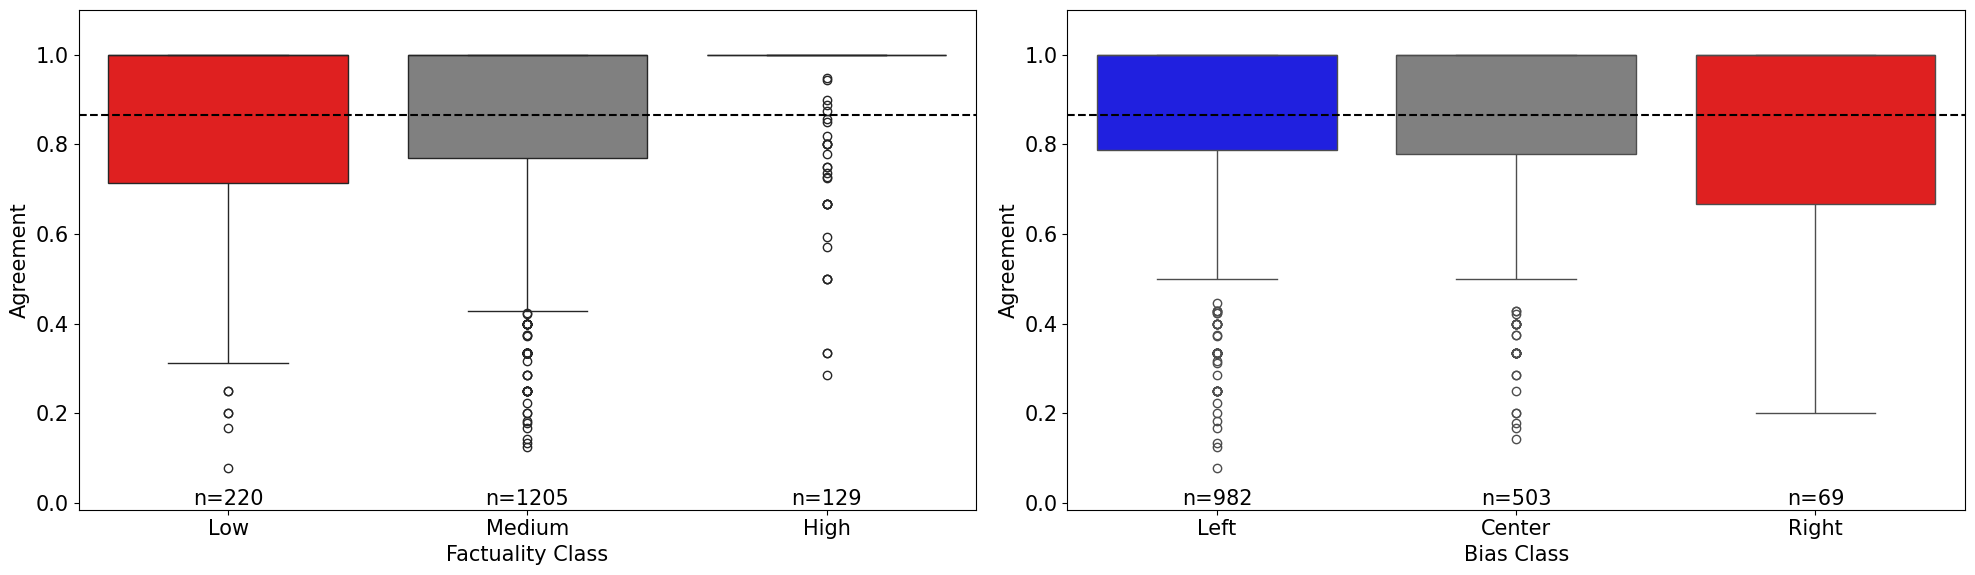

In [1285]:
average_agreement = notes_filtered['agreement'].mean()

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
factuality_order = ['Low', 'Medium', 'High']
colors = {'Low': 'red', 'Medium': 'gray', 'High': 'green'}
sns.boxplot(data=notes_filtered, x='factuality_class', y="agreement", order=factuality_order, palette=colors)
plt.axhline(average_agreement, color='black', linestyle='--')
counts = notes_filtered['factuality_class'].value_counts().reindex(factuality_order)
for i, factuality in enumerate(factuality_order):
    plt.text(i, notes_filtered['agreement'].min() - (notes_filtered['agreement'].max() - notes_filtered['agreement'].min()) * 0.05, f'n={counts[factuality]}', ha='center', va='top')
plt.xlabel('Factuality Class')
plt.ylabel('Agreement')
plt.ylim(notes_filtered['agreement'].min() - (notes_filtered['agreement'].max() - notes_filtered['agreement'].min()) * 0.1, notes_filtered['agreement'].max() + 0.1)

plt.subplot(1, 2, 2)
bias_order = ['Left', 'Center', 'Right']
colors = {'Left': 'blue', 'Center': 'gray', 'Right': 'red'}
sns.boxplot(data=notes_filtered, x='bias_class', y="agreement", order=bias_order, palette=colors)
plt.axhline(average_agreement, color='black', linestyle='--')
counts = notes_filtered['bias_class'].value_counts().reindex(bias_order)
for i, bias in enumerate(bias_order):
    plt.text(i, notes_filtered['agreement'].min() - (notes_filtered['agreement'].max() - notes_filtered['agreement'].min()) * 0.05, f'n={counts[bias]}', ha='center', va='top')
plt.xlabel('Bias Class')
plt.ylabel('Agreement')
plt.ylim(notes_filtered['agreement'].min() - (notes_filtered['agreement'].max() - notes_filtered['agreement'].min()) * 0.1, notes_filtered['agreement'].max() + 0.1)

plt.tight_layout()
plt.show()